In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
# Membaca Dataset

In [7]:
df = pd.read_csv ('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [ ]:
# Data Preparation

In [10]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [11]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [12]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


In [ ]:
# Menentukan jumlah cluster dengan elbow

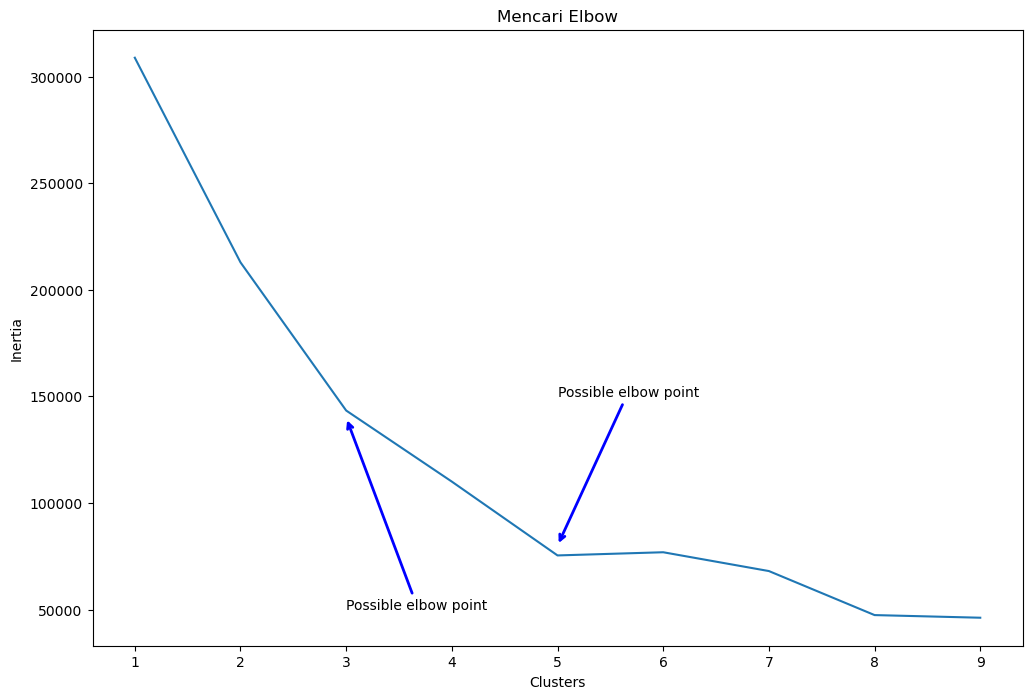

In [13]:
cluster = []
for i in range (1,10):
    km = KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,10)), y =cluster, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

In [ ]:
# Clustering Process

In [16]:
n_clust = 4
kmeans = KMeans (n_clusters=n_clust).fit(X)
X['Labels'] = kmeans.labels_

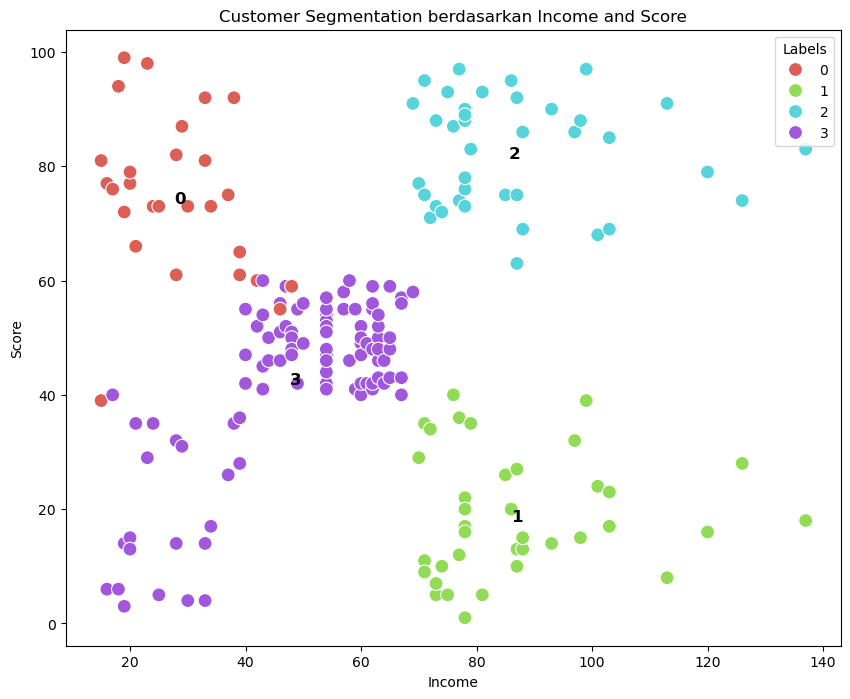

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X, palette=sns.color_palette('hls', n_clust), s=100)

for label in sorted(X['Labels'].unique()):
    plt.annotate(
        label,
        (X[X['Labels'] == label]['Income'].mean(),
         X[X['Labels'] == label]['Score'].mean()),
        horizontalalignment='center',
        verticalalignment='center',
        size=12, weight='bold', color='black'
    )

plt.title("Customer Segmentation berdasarkan Income and Score")
plt.show()


In [27]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       0
1     21      15     81       0
2     20      16      6       3
3     23      16     77       0
4     31      17     40       3
..   ...     ...    ...     ...
195   35     120     79       2
196   45     126     28       1
197   32     126     74       2
198   32     137     18       1
199   30     137     83       2

[200 rows x 4 columns]


In [30]:
X.to_excel('clustering_cust segmentation.xlsx', index = False)

print ('success')

success
